# AYA Project

Les donnees proviennent de plusieurs sources:
* Leucegene:
500 patients dont 80 AYA
donnees:  p-value analyse expression differentielle
non normalise 
analyse avec DeSeq2
* TGCA: ~ 200 adultes
* Target (https://ocg.cancer.gov/programs/target/projects/acute-myeloid-leukemia):
Les chercheurs de TARGET analysent les tumeurs de patients pediatriques, dont beaucoup ont fait une rechute, afin d'identifier des biomarqueurs en correlation avec de mauvais resultats cliniques et / ou de nouvelles approches therapeutiques pour traiter la LMA chez l'enfant. (200 patients)


But : Analyse expression differentielle, mettre en evidence des genes specifique aux Adolescents et jeunes Adultes (18-40 ans).



In [2]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("DESeq2", version = "3.8")
library("DESeq2")
#BiocManager::install("genefilter", version = "3.8")
library(genefilter)

In [4]:
library('plyr') #package pour table de comptage
library(magrittr)
library("varhandle")
#library(tidyr)

## Repartition des echantillons selon leurs caracteristiques cliniques

In [5]:
data_API = read.csv("/home/safia/Documents/AYA/Leucegene risk complete.txt",header = T,sep = "\t")
data_API<- data.frame(data_API[,-1], row.names=data_API[,1])

t_data_API = as.data.frame(t(data_API)) # inverse colonne ligne
colnames(t_data_API) <- gsub(" ","_",colnames(t_data_API)) # remplace les espaces dans le nom des colonnes
t_data_API <- head(t_data_API, -1) # supprimme la deriniere ligne data_type 

inf_40 = t_data_API[which(as.integer(t_data_API$Age_at_diagnosis)<=40),]
data_AYA = inf_40[which(as.integer(inf_40$Age_at_diagnosis)>=18),]

### Cytogenetic risk

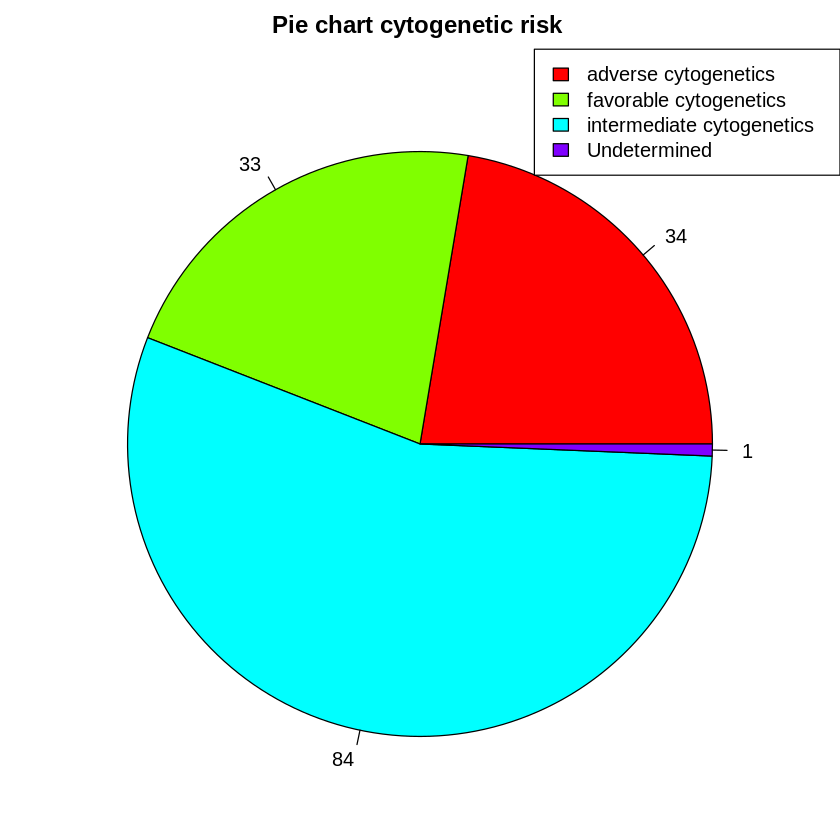

In [6]:

# count table
count_cytogenetic_risk = count(data_AYA,"cytogenetic_risk " )

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_risk$freq, main = "Pie chart cytogenetic risk ",labels = count_cytogenetic_risk$freq, col = rainbow(length(count_cytogenetic_risk$freq)))
legend("topright",legend = count_cytogenetic_risk$cytogenetic_risk, cex = 1,ncol = 1,
       fill = rainbow(length(count_cytogenetic_risk$freq)),xpd=NA)


### Cytogenetic subgroup

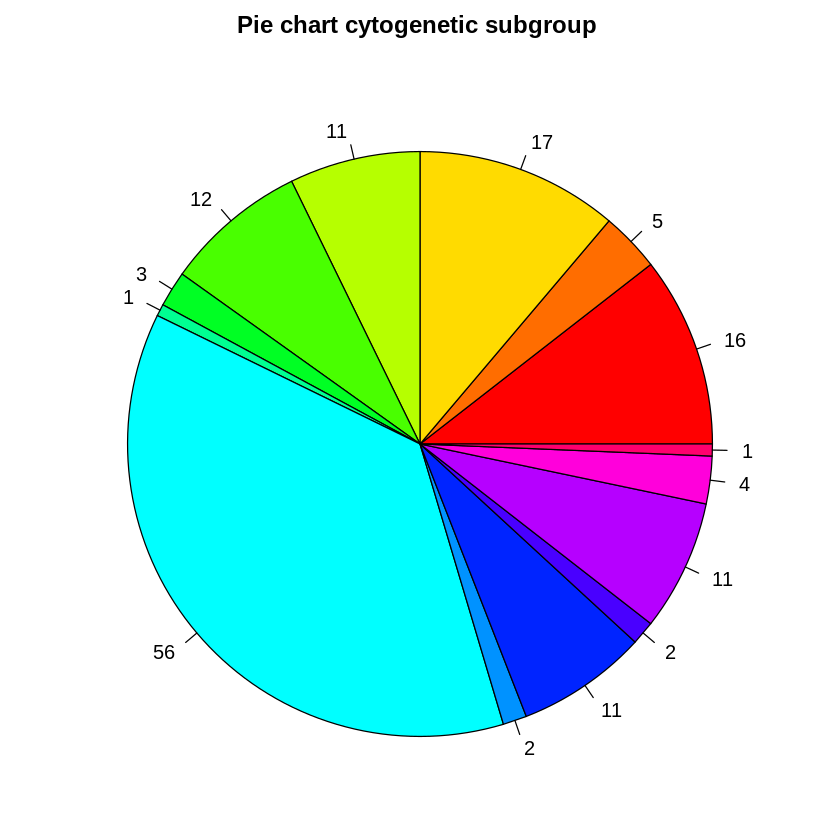

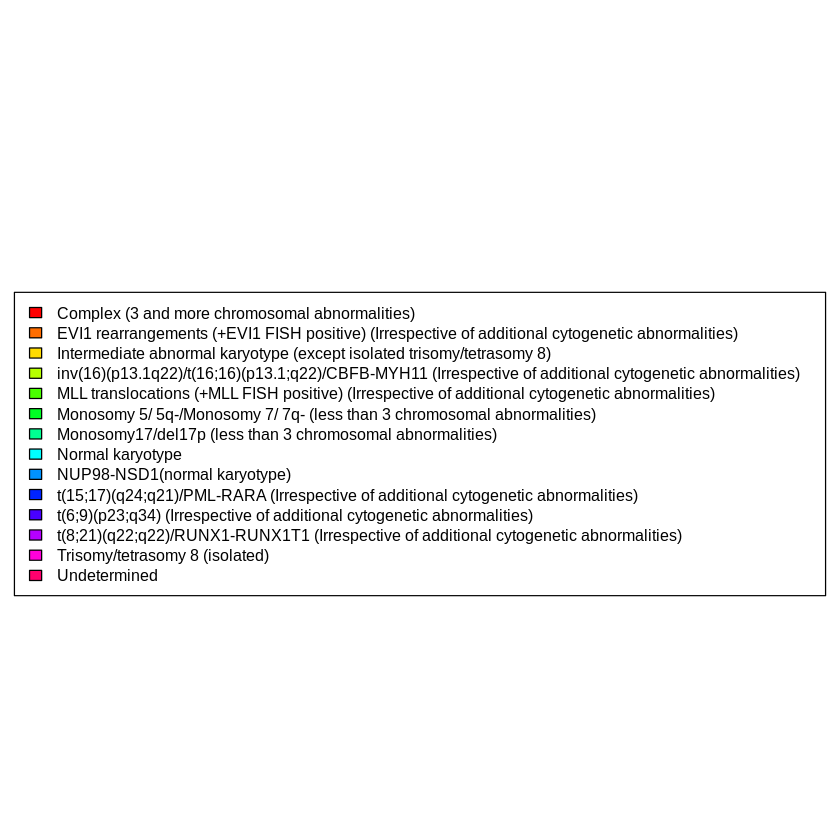

In [7]:
# count table
count_cytogenetic_subgroup = count(data_AYA, "cytogenetic_subgroup")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_subgroup$freq, main = "Pie chart cytogenetic subgroup ",labels = count_cytogenetic_subgroup$freq, col = rainbow(length(count_cytogenetic_subgroup$freq)))

plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("center",legend = count_cytogenetic_subgroup$cytogenetic_subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_cytogenetic_subgroup$freq)),xpd=NA)


### Subgroup

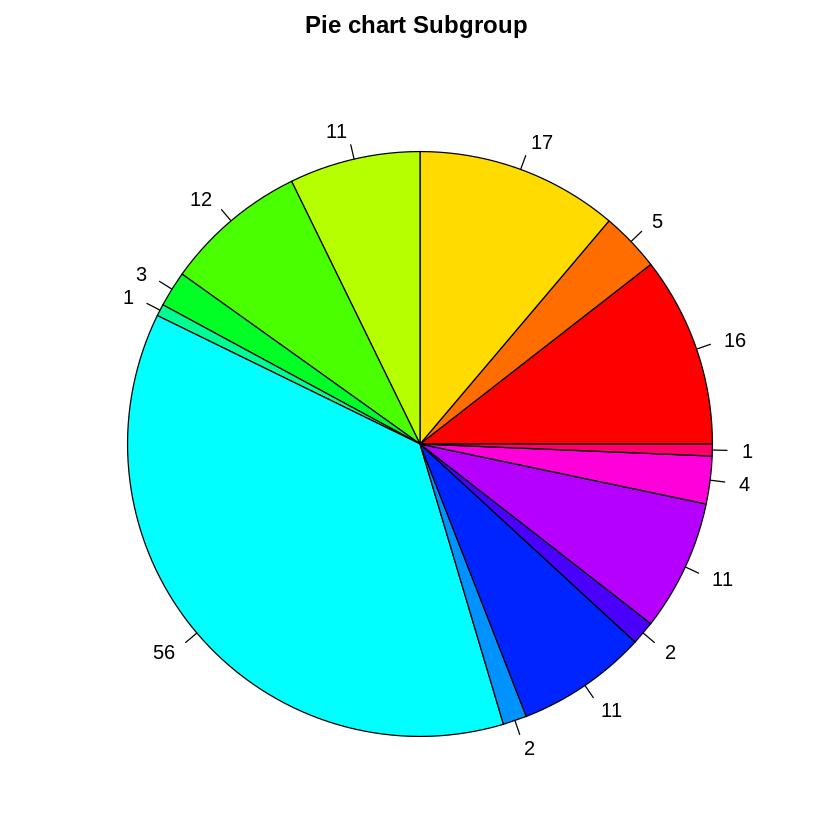

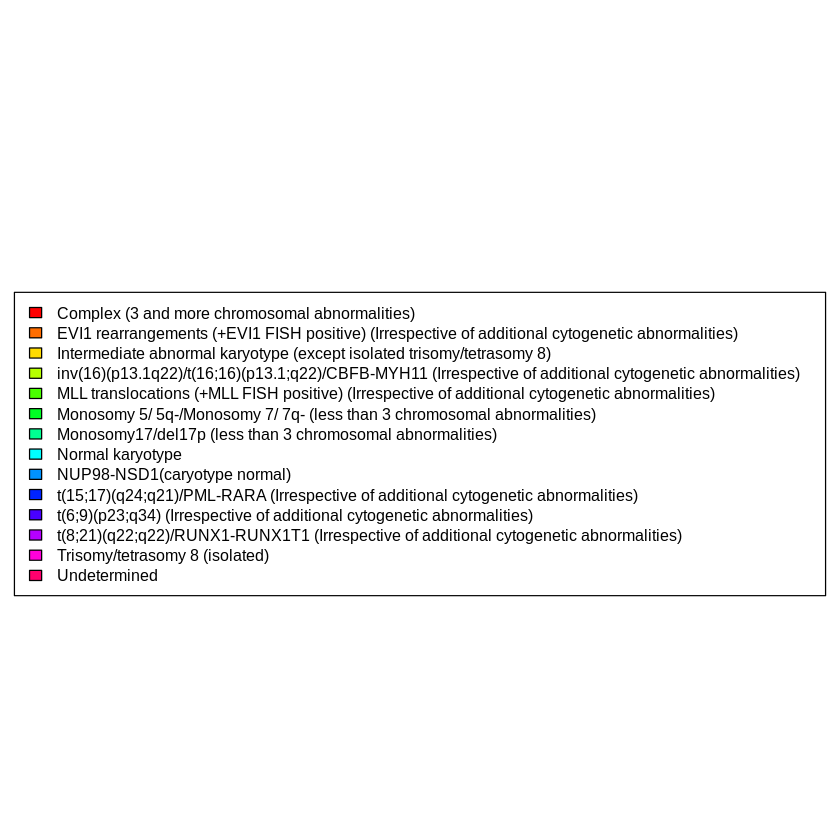

In [8]:
# count table
count_Subgroup = count(data_AYA, "Subgroup")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_Subgroup$freq, main = "Pie chart Subgroup ",labels = count_Subgroup$freq, col = rainbow(length(count_Subgroup$freq)))

plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("center",legend = count_Subgroup$Subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_Subgroup$freq)),xpd=NA)

### WHO 2008

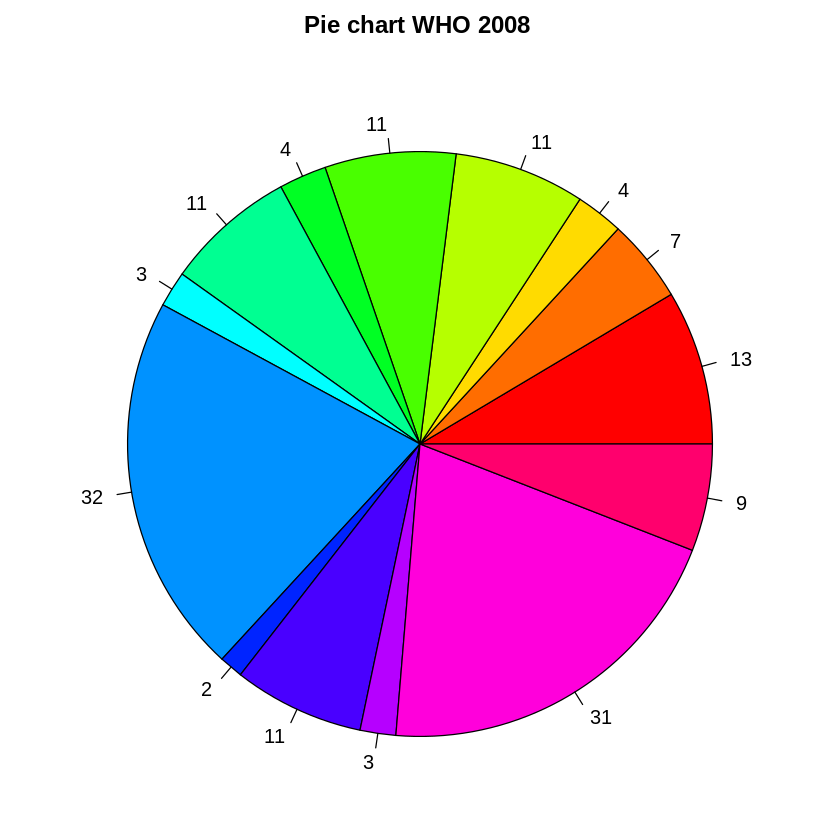

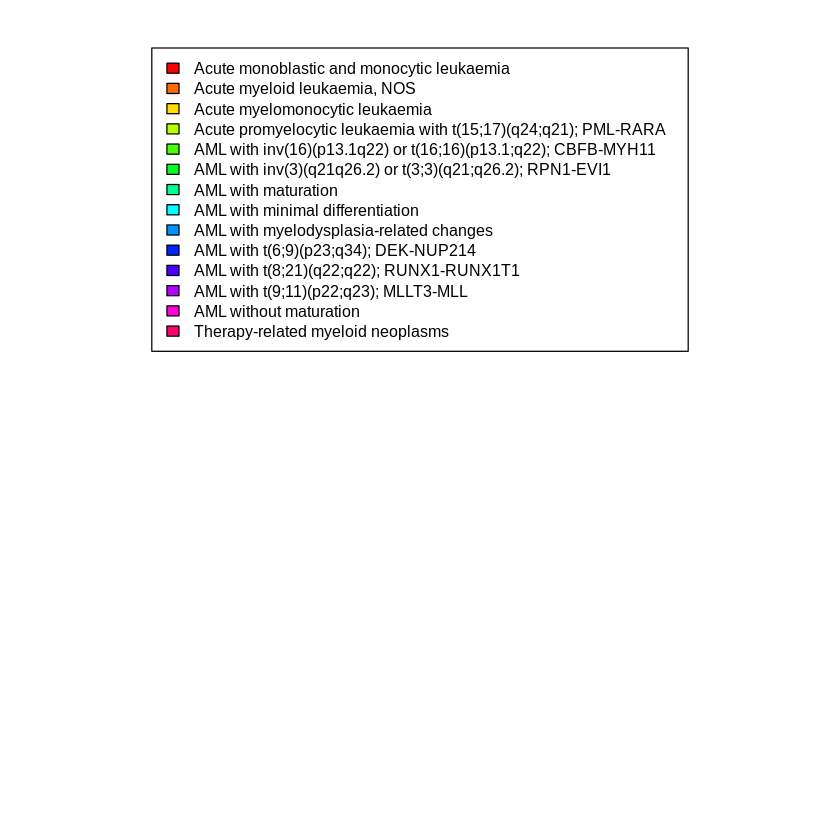

In [9]:
# count table
count_Who = count(data_AYA, "WHO_2008")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_Who$freq, main = "Pie chart WHO 2008 ",labels = count_Who$freq, col = rainbow(length(count_Who$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_Who$WHO_2008, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_Who$freq)),xpd=NA)


### FAB

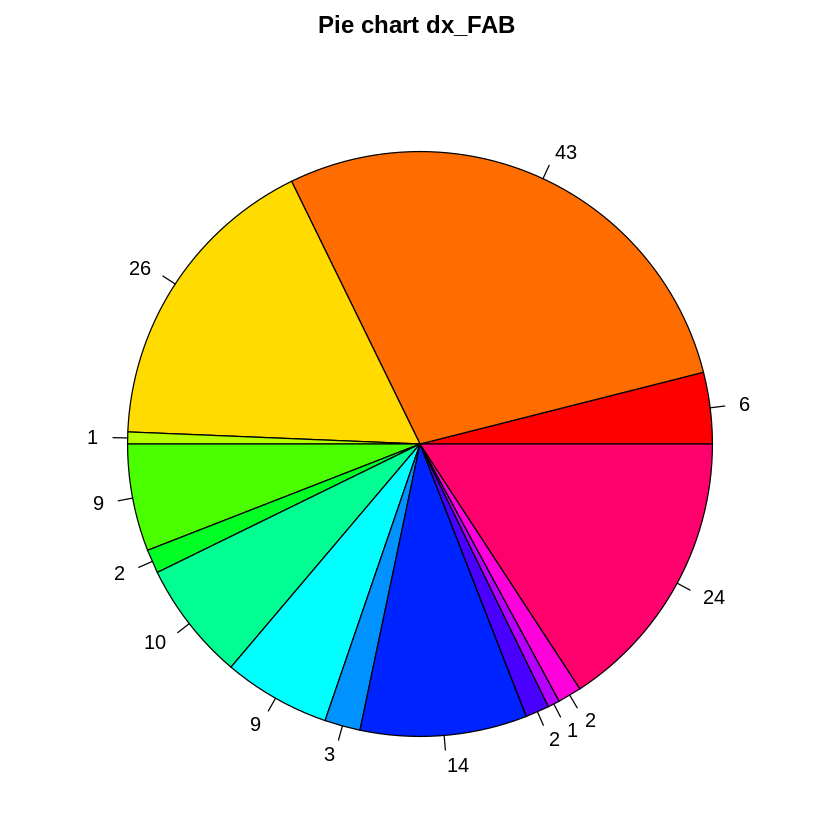

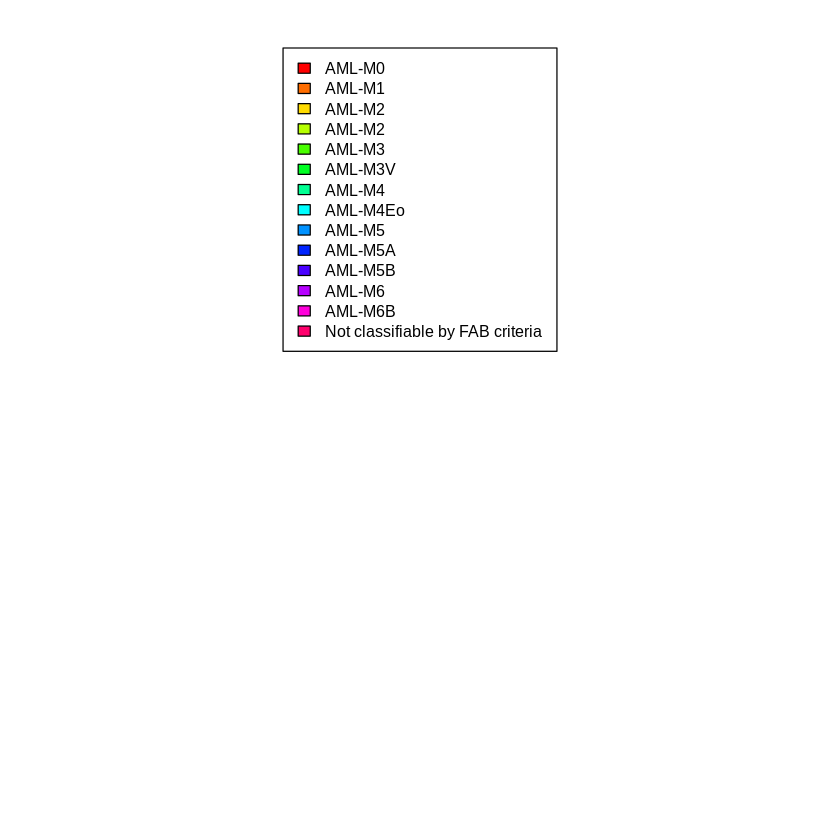

In [10]:
# count table
count_FAB = count(data_AYA, "dx_FAB")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_FAB$freq, main = "Pie chart dx_FAB ",labels = count_FAB$freq, col = rainbow(length(count_FAB$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_FAB$dx_FAB, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_FAB$freq)),xpd=NA)


## % Blast

[1] 90  9

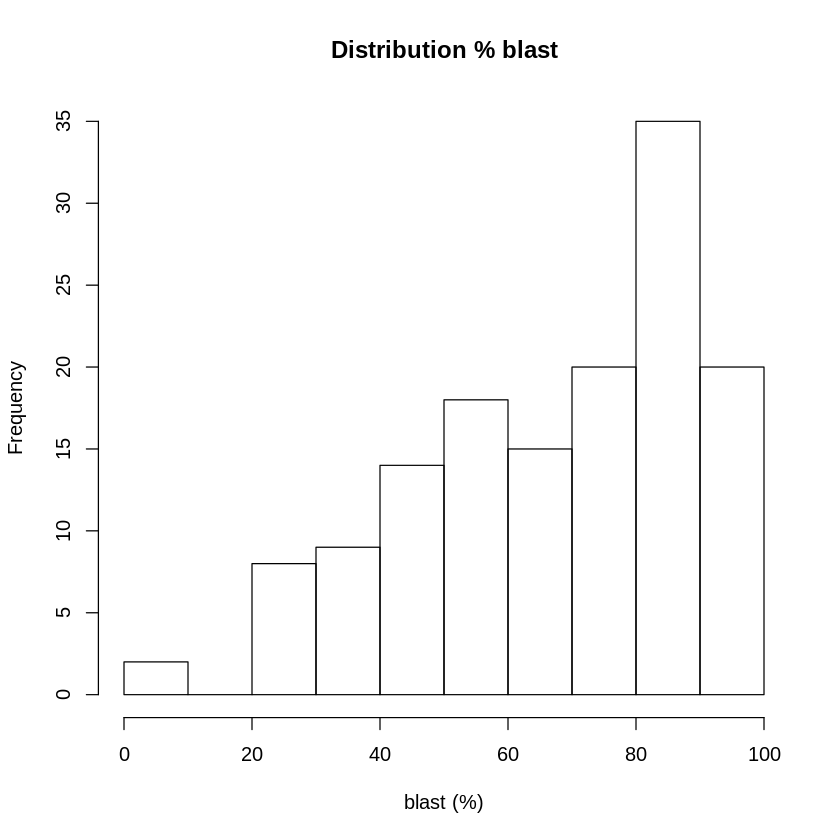

In [11]:
hist(as.numeric(unfactor(data_AYA$`blasts_(%)`)),xlab = "blast (%)", main = "Distribution % blast")

blast_sup_50 = data_AYA[which(unfactor(data_AYA$`blasts_(%)`)>=70),]
#blast_sup_50 # Individus sequence avec un pourcentage de blast > 50 %
dim(blast_sup_50) # Nombre d'individus sequence avec un pourcentage de blast > 50 %



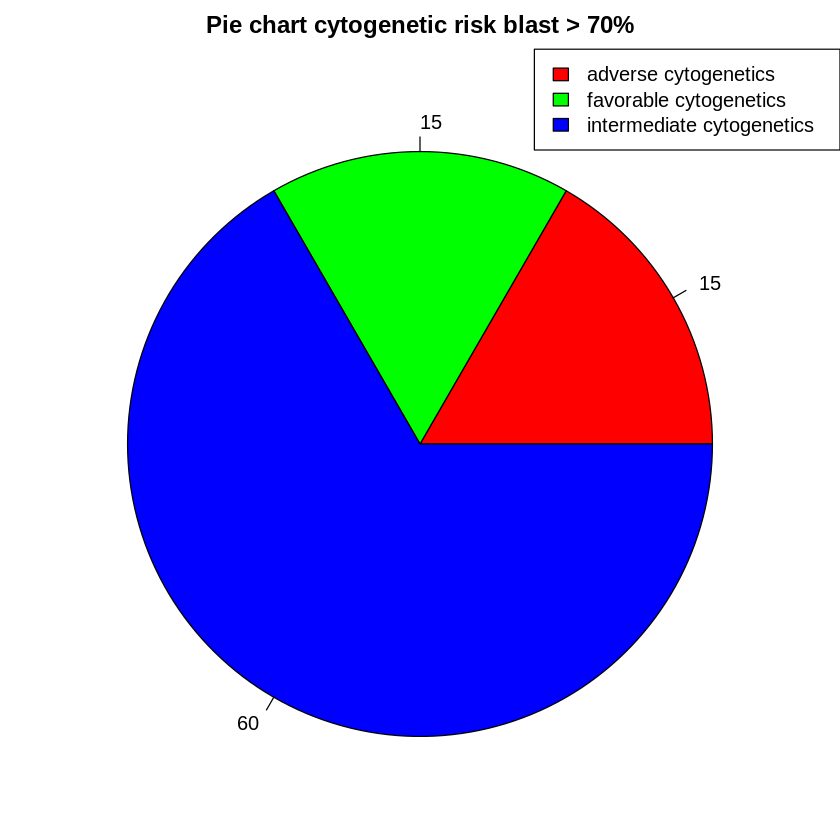

In [12]:

# count table
count_cytogenetic_risk = count(blast_sup_50,"cytogenetic_risk " )

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_risk$freq, main = "Pie chart cytogenetic risk blast > 70%",labels = count_cytogenetic_risk$freq, col = rainbow(length(count_cytogenetic_risk$freq)))
legend("topright",legend = count_cytogenetic_risk$cytogenetic_risk, cex = 1,ncol = 1,
       fill = rainbow(length(count_cytogenetic_risk$freq)),xpd=NA)


In [13]:
adverse = row.names(blast_sup_50[which(unfactor(blast_sup_50$cytogenetic_risk)=="adverse cytogenetics"),])
blast_sup_50_adv = blast_sup_50[which(rownames(blast_sup_50) %in% adverse),]

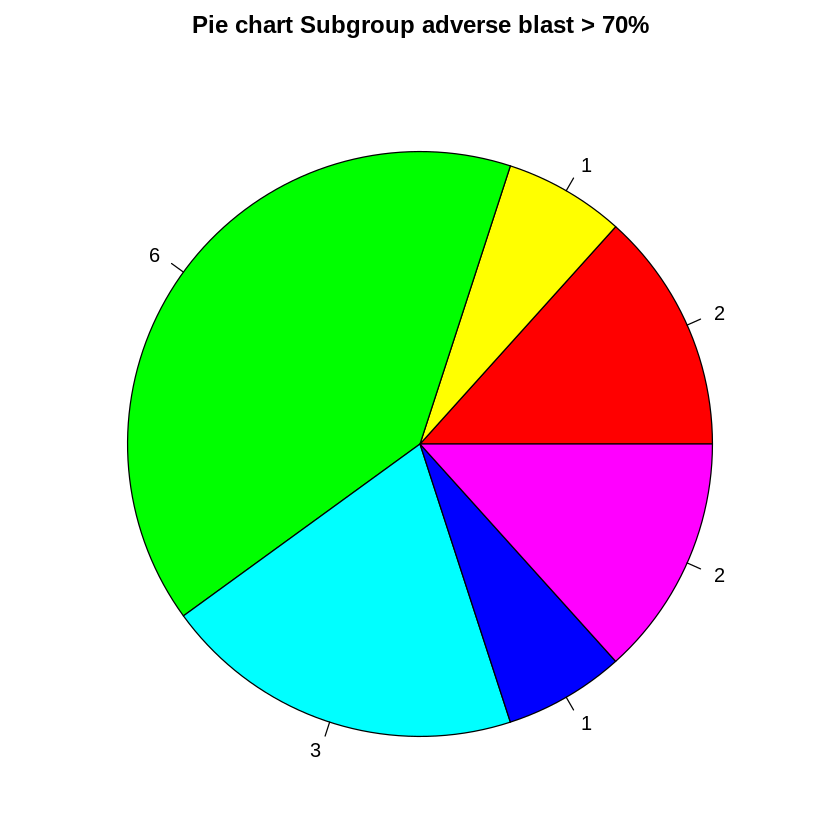

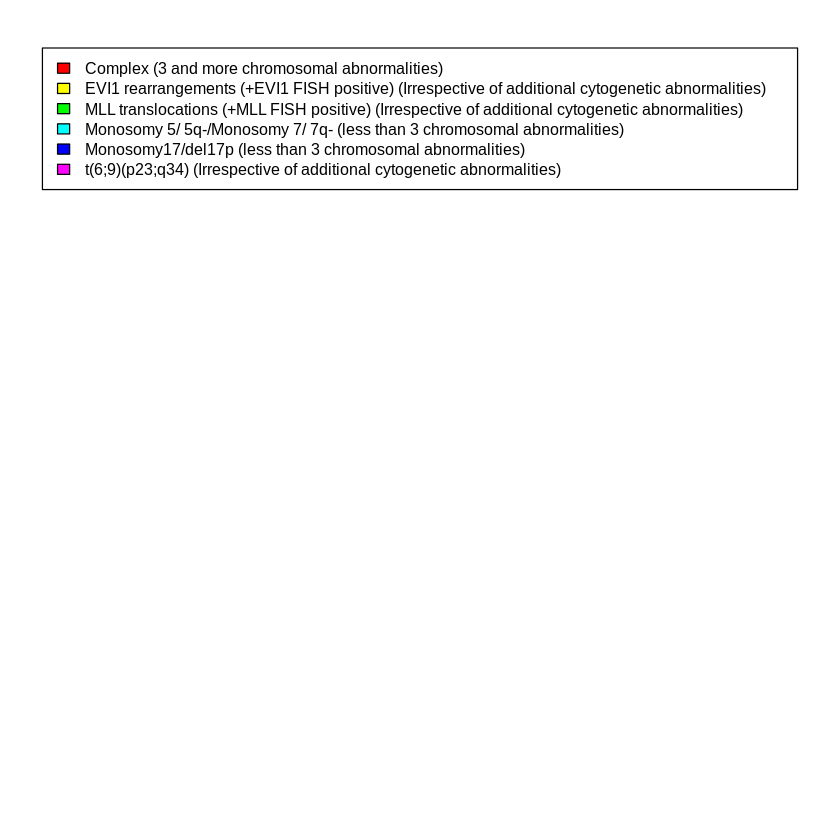

In [14]:

# count table
count_cytogenetic_risk = count(blast_sup_50_adv,"Subgroup" )

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_risk$freq, main = "Pie chart Subgroup adverse blast > 70%",labels = count_cytogenetic_risk$freq, col = rainbow(length(count_cytogenetic_risk$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_cytogenetic_risk$Subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_cytogenetic_risk$freq)),xpd=NA)

